FNN p6

In [6]:
import tensorflow as tf
tf.set_random_seed(777) # for reproducibility

# Training data set
x_data = [[1,2,1],[1,3,2],[1,3,4],[1,5,5],[1,7,5],[1,2,5],[1,6,6],[1,7,7]]
y_data = [[0,0,1],[0,0,1],[0,0,1],[0,1,0],[0,1,0],[0,1,0],[1,0,0],[1,0,0]]

# Evaluation our model using this test dataset
x_test = [[2,1,1],[3,1,2],[3,3,4]]
y_test = [[0,0,1],[0,0,1],[0,0,1]]

X = tf.placeholder("float",[None,3])
Y = tf.placeholder("float",[None,3])

W = tf.Variable(tf.random_normal([3,3]))
b = tf.Variable(tf.random_normal([3]))

# tf.nn.softmax computes softmax activations
# softmax = exp(logits)/reduce_sum(exp(logits),dim)
hypothesis = tf.nn.softmax(tf.matmul(X,W)+b)
#Cross entropy cost/loss
cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(hypothesis),axis = 1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 1e-10).minimize(cost)

# Correct prediction Test model
prediction = tf.argmax(hypothesis,1)
is_correct = tf.equal(prediction,tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(is_correct,tf.float32))

# Launch graph
with tf.Session() as sess:
    #Initialize Tensorflow variables
    sess.run(tf.global_variables_initializer())
    
    #taining
    for step in range(201):
        cost_val, W_val, _ = sess.run([cost,W,optimizer], feed_dict={X:x_data,Y:y_data})
        print(step, cost_val, W_val)
    
    #predict(test)
    print("Prediction: ", sess.run(prediction, feed_dict={X:x_test}))
    #Calculate the accuracy
    print("Accuracy: ", sess.run(accuracy, feed_dict={X:x_data,Y:y_data}))

0 2.5813289 [[-0.25062233 -0.5928919   0.6728927 ]
 [-1.2992615   0.17300437 -0.4540232 ]
 [ 0.728807    0.508409    0.47303352]]
1 2.5813289 [[-0.25062233 -0.5928919   0.6728927 ]
 [-1.2992615   0.17300437 -0.4540232 ]
 [ 0.728807    0.508409    0.47303352]]
2 2.5813289 [[-0.25062233 -0.5928919   0.6728927 ]
 [-1.2992615   0.17300437 -0.4540232 ]
 [ 0.728807    0.508409    0.47303352]]
3 2.5813289 [[-0.25062233 -0.5928919   0.6728927 ]
 [-1.2992615   0.17300437 -0.4540232 ]
 [ 0.728807    0.508409    0.47303352]]
4 2.5813289 [[-0.25062233 -0.5928919   0.6728927 ]
 [-1.2992615   0.17300437 -0.4540232 ]
 [ 0.728807    0.508409    0.47303352]]
5 2.5813289 [[-0.25062233 -0.5928919   0.6728927 ]
 [-1.2992615   0.17300437 -0.4540232 ]
 [ 0.728807    0.508409    0.47303352]]
6 2.5813289 [[-0.25062233 -0.5928919   0.6728927 ]
 [-1.2992615   0.17300437 -0.4540232 ]
 [ 0.728807    0.508409    0.47303352]]
7 2.5813289 [[-0.25062233 -0.5928919   0.6728927 ]
 [-1.2992615   0.17300437 -0.4540232 ]


Training for FNN p13_정규화(Normalization)

In [7]:
import tensorflow as tf
import numpy as np
tf.set_random_seed(777) # for reproducibility

# Normalization function
def min_max_scaler(data):
    numerator = data - np.min(data,0)
    denominator = np.max(data,0) - np.min(data,0)
    # noise term prevents the zero division
    return numerator/(denominator+1e-7)

xy = np.array(
    [
        [828.659973, 833.450012, 908100, 828.349976, 831.659973],
        [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
        [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
        [816, 820.958984, 1008100, 815.48999, 819.23999],
        [819.359985, 823, 1188100, 818.469971, 818.97998],
        [819, 823, 1198100, 816, 820.450012],
        [811.700012, 815.25, 1098100, 809.780029, 813.669983],
        [809.51001, 816.659973, 1398100, 804.539978, 809.559998],
    ]
)
# very imoprtant. It does not work without it.
xy = min_max_scaler(xy)  #정규화(0~1)

x_data = xy[:,0:-1] 
y_data = xy[:,[-1]]  # class

xy = min_max_scaler(xy) 이 부분 주석 처리 후 결과 살펴보기

=> 정규화 했을 때와 안했을 때 비교

In [8]:
# placeholders for a tensor that will be always fed.
#정규화된 X,Y값
X = tf.placeholder(tf.float32, shape = [None,4])
Y = tf.placeholder(tf.float32, shape = [None,1])

W = tf.Variable(tf.random_normal([4,1]),name='weight')
b = tf.Variable(tf.random_normal([1]),name='bias')

# Hypothesis
hypothesis = tf.matmul(X,W)+b

# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis-Y))

# Minimize
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)

# Launch the graph in a session
with tf.Session() as sess:
    # Initializes global variables in the graph.
    sess.run(tf.global_variables_initializer())
    
    for step in range(101):
        _, cost_val, hy_val = sess.run([train, cost, hypothesis], feed_dict={X:x_data,Y:y_data})
        print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)

0 Cost:  2.3110723 
Prediction:
 [[-1.1752137 ]
 [-1.8149363 ]
 [-1.0856442 ]
 [-0.29111305]
 [-0.715787  ]
 [-0.7720453 ]
 [-0.02516393]
 [-0.43777484]]
1 Cost:  2.3109121 
Prediction:
 [[-1.1751392 ]
 [-1.8148639 ]
 [-1.0855845 ]
 [-0.29106763]
 [-0.7157328 ]
 [-0.7719929 ]
 [-0.02513   ]
 [-0.43774143]]
2 Cost:  2.3107517 
Prediction:
 [[-1.1750646 ]
 [-1.8147914 ]
 [-1.0855248 ]
 [-0.2910223 ]
 [-0.7156784 ]
 [-0.7719403 ]
 [-0.02509606]
 [-0.43770796]]
3 Cost:  2.3105912 
Prediction:
 [[-1.1749899 ]
 [-1.8147192 ]
 [-1.0854653 ]
 [-0.2909769 ]
 [-0.71562386]
 [-0.7718879 ]
 [-0.0250621 ]
 [-0.43767443]]
4 Cost:  2.3104308 
Prediction:
 [[-1.1749153 ]
 [-1.8146468 ]
 [-1.0854055 ]
 [-0.29093158]
 [-0.7155695 ]
 [-0.77183545]
 [-0.02502817]
 [-0.43764102]]
5 Cost:  2.3102703 
Prediction:
 [[-1.1748408 ]
 [-1.8145744 ]
 [-1.0853459 ]
 [-0.2908862 ]
 [-0.715515  ]
 [-0.771783  ]
 [-0.02499418]
 [-0.43760756]]
6 Cost:  2.31011 
Prediction:
 [[-1.1747663 ]
 [-1.814502  ]
 [-1.0852861 ]


FNN with MNIST Dataset p15_손글씨 예측

In [9]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [16]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x0000025A39AC28C8>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x0000025A39AC2D88>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x0000025A396CD0C8>)

In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random

tf.set_random_seed(777) # for reproducibility

from tensorflow.examples.tutorials.mnist import input_data

# Check out https://www.tensorflow.org/get_started/mnist/beginners for more
#information about the mnist dataset
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

nb_classes = 10

# MNIST data image of shape 28 * 28 = 784
X = tf.placeholder(tf.float32, [None, 784])
# 0 - 9 digits recognition = 10 classes
Y = tf.placeholder(tf.float32, [None, nb_classes])

W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

# Hypothesis (using softmax)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Test model
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))

# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [13]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x0000022EDF67CDC8>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x0000022EDFC32708>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x0000022EDFAB8D88>)

Epoch: 0001, Cost: 2.999980635
Epoch: 0002, Cost: 1.112171234
Epoch: 0003, Cost: 0.883831513
Epoch: 0004, Cost: 0.773414772
Epoch: 0005, Cost: 0.703741424
Epoch: 0006, Cost: 0.653920944
Epoch: 0007, Cost: 0.616439303
Epoch: 0008, Cost: 0.586127546
Epoch: 0009, Cost: 0.561896645
Epoch: 0010, Cost: 0.540679185
Epoch: 0011, Cost: 0.522377744
Epoch: 0012, Cost: 0.506931225
Epoch: 0013, Cost: 0.492690948
Epoch: 0014, Cost: 0.480440156
Epoch: 0015, Cost: 0.469311172
Learning finished
Accuracy:  0.8887
Label:  [0 0 0 0 0 0 0 0 0 0]
Prediction:  [1]


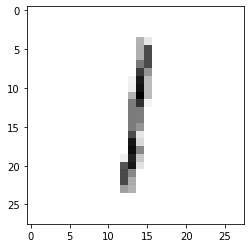

In [20]:
# parameters
num_epochs = 15
batch_size = 100
num_iterations = int(mnist.train.num_examples / batch_size)

with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    # Training cycle
    for epoch in range(num_epochs):
        avg_cost = 0
        
        for i in range(num_iterations):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, cost_val = sess.run([train, cost], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += cost_val / num_iterations
        print("Epoch: {:04d}, Cost: {:.9f}".format(epoch + 1, avg_cost))
        
    print("Learning finished")
    
    # Test the model using test sets
    print("Accuracy: ",
        accuracy.eval(
            session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels}
        ),
    )
    
    # Get one and predict
    r = random.randint(0,mnist.test.num_examples-1)
    print("Label: ",sess.run(tf.argmax(mnist.test.labels[r:r+1])))
    print(
        "Prediction: ", sess.run(tf.argmax(hypothesis,1), feed_dict={X:mnist.test.images[r:r+1]}),
    )
    
    plt.imshow(
        mnist.test.images[r:r+1].reshape(28,28),
        cmap = "Greys",
        interpolation="nearest",
    )
    plt.show()

p23 Deep FNN_XOR gate

In [28]:
import tensorflow as tf
import numpy as np

# XOR data set
x_data = np.array([[0,0],[0,1],[1,0],[1,1]],dtype = np.float32)
y_data = np.array([[0],[1],[1],[0]],dtype = np.float32)

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
W = tf.Variable(tf.random_normal([2,1]), name = 'weight')
b = tf.Variable(tf.random_normal([1], name = 'bias'))

# Hypothesis using sigmoid 
hypothesis = tf.sigmoid(tf.matmul(X,W)+b)

# cost/loss function
cost = -tf.reduce_mean(Y* tf.log(hypothesis) + (1-Y) * tf.log(1-hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(cost)

# Accuracy computation
# True if hypothes > 0.5, dtype else False
predicted = tf.cast(hypothesis>0.5,tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted,Y), dtype = tf.float32))

# Launch graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(10001):
        sess.run(train, feed_dict={X:x_data,Y:y_data})
        if step % 100 == 0:
            print("step: ",step, sess.run(cost, feed_dict={X:x_data,Y:y_data}),sess.run(W))
            
        h,c,a = sess.run([hypothesis, predicted, accuracy], feed_dict={X:x_data,Y:y_data})
        print("\nHypothesis: ",h,"\nCorrect: ",c,"\nAccuracy: ",a)

step:  0 0.9405538 [[0.78527266]
 [0.86779183]]

Hypothesis:  [[0.63380706]
 [0.8047697 ]
 [0.7914779 ]
 [0.9003975 ]] 
Correct:  [[1.]
 [1.]
 [1.]
 [1.]] 
Accuracy:  0.5

Hypothesis:  [[0.6272234 ]
 [0.79745865]
 [0.78385913]
 [0.8945856 ]] 
Correct:  [[1.]
 [1.]
 [1.]
 [1.]] 
Accuracy:  0.5

Hypothesis:  [[0.6207529 ]
 [0.790113  ]
 [0.77621776]
 [0.88861   ]] 
Correct:  [[1.]
 [1.]
 [1.]
 [1.]] 
Accuracy:  0.5

Hypothesis:  [[0.6144017 ]
 [0.78274685]
 [0.76856863]
 [0.88248134]] 
Correct:  [[1.]
 [1.]
 [1.]
 [1.]] 
Accuracy:  0.5

Hypothesis:  [[0.6081751]
 [0.7753743]
 [0.7609264]
 [0.8762109]] 
Correct:  [[1.]
 [1.]
 [1.]
 [1.]] 
Accuracy:  0.5

Hypothesis:  [[0.6020779]
 [0.7680092]
 [0.7533055]
 [0.8698115]] 
Correct:  [[1.]
 [1.]
 [1.]
 [1.]] 
Accuracy:  0.5

Hypothesis:  [[0.5961143 ]
 [0.7606649 ]
 [0.74571955]
 [0.863296  ]] 
Correct:  [[1.]
 [1.]
 [1.]
 [1.]] 
Accuracy:  0.5

Hypothesis:  [[0.59028786]
 [0.7533546 ]
 [0.7381821 ]
 [0.85667825]] 
Correct:  [[1.]
 [1.]
 [1.]

<결과>

매우 낮은 정확도를 보인다.

모델의 정확도를 높이기 위해 layer을 추가한다. (Deep FNN)

In [37]:
import tensorflow as tf
import numpy as np

# XOR data set
x_data = np.array([[0,0],[0,1],[1,0],[1,1]],dtype = np.float32)
y_data = np.array([[0],[1],[1],[0]],dtype = np.float32)

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# weight, bias
W1 = tf.Variable(tf.random_normal([2,2]), name = 'weight1')
b1 = tf.Variable(tf.random_normal([2]), name = 'bias1')
layer1 = tf.sigmoid(tf.matmul(X,W1)+b1)
# add layer
W2 = tf.Variable(tf.random_normal([2,1]), name = 'weight2')
b2 = tf.Variable(tf.random_normal([1]), name = 'bias2')
hypothesis = tf.sigmoid(tf.matmul(layer1,W2)+b2)

# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1-Y) * tf.log(1-hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(cost)

# Accuracy computation
# True if hypothesis > 0.5 else False
predicted = tf.cast(hypothesis > 0.5,tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted,Y),tf.float32))

# Launch graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(10001):
        sess.run(train, feed_dict={X:x_data,Y:y_data})
        if step % 100 == 0:
            print("step: ",step,sess.run(cost,feed_dict={X:x_data,Y:y_data}))
            print("W1:\n",sess.run(W1))
            print("W2:\n",sess.run(W2))
    
    # Accuracy report 
    h, c, a = sess.run([hypothesis,predicted,accuracy],feed_dict={X:x_data,Y:y_data})
    print("\nHypothesis: ",h,"\nCorrect: ",c,"\nAccuracy: ",a)

step:  0 0.76841426
W1:
 [[-0.10161247 -0.3498569 ]
 [-0.9204285  -1.0702963 ]]
W2:
 [[-1.2642472 ]
 [-0.20045833]]
step:  100 0.69208634
W1:
 [[-0.2716303  -0.36601683]
 [-0.9775055  -1.0770025 ]]
W2:
 [[-1.0506352 ]
 [-0.04141567]]
step:  200 0.6906426
W1:
 [[-0.3814062  -0.37111306]
 [-0.99615896 -1.0780318 ]]
W2:
 [[-1.0480943 ]
 [-0.04704613]]
step:  300 0.6890263
W1:
 [[-0.496307  -0.3772092]
 [-1.0285362 -1.0792701]]
W2:
 [[-1.0649067 ]
 [-0.05870507]]
step:  400 0.68701106
W1:
 [[-0.6193002 -0.3844779]
 [-1.076828  -1.0808159]]
W2:
 [[-1.0957566 ]
 [-0.06946351]]
step:  500 0.68449235
W1:
 [[-0.7506705  -0.39273447]
 [-1.1412042  -1.0826461 ]]
W2:
 [[-1.1423492 ]
 [-0.07853036]]
step:  600 0.6813703
W1:
 [[-0.8901279  -0.40172517]
 [-1.2212503  -1.0847088 ]]
W2:
 [[-1.2064977 ]
 [-0.08530414]]
step:  700 0.67754877
W1:
 [[-1.0370373  -0.41113222]
 [-1.3160751  -1.086924  ]]
W2:
 [[-1.289529 ]
 [-0.0891107]]
step:  800 0.67293036
W1:
 [[-1.1906457  -0.42056504]
 [-1.4245017  -1.

최적의 weight값 

W1:
 [[-6.4971523 -4.765433 ]
 [-6.5436687 -4.77214  ]]
W2:
 [[-10.300909]
 [  9.777515]]


<결과>

layer를 추가하여 layer가 1개 였을때와는 다르게 정확도가 1로 매우 높은 모델 예측도를 보인다.

In [42]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random

tf.set_random_seed(777) # for reproducibility

from tensorflow.examples.tutorials.mnist import input_data

# Check out https://www.tensorflow.org/get_started/mnist/beginners for more
#information about the mnist dataset
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

nb_classes = 10

# MNIST data image of shape 28 * 28 = 784
X = tf.placeholder(tf.float32, [None, 784])
# 0 - 9 digits recognition = 10 classes
Y = tf.placeholder(tf.float32, [None, nb_classes])

W1 = tf.Variable(tf.random_normal([784, 200]), name = 'weight1')
b1 = tf.Variable(tf.random_normal([200]), name = 'bias1')
layer1 = tf.sigmoid(tf.matmul(X,W1)+b1)
W2 = tf.Variable(tf.random_normal([200,nb_classes], name = 'weight2'))
b2 = tf.Variable(tf.random_normal([nb_classes], name = 'bias2'))

# Hypothesis (using softmax)
hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)

cost =  tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Test model
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))

# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Epoch: 0001, Cost: nan
Epoch: 0002, Cost: nan
Epoch: 0003, Cost: nan
Epoch: 0004, Cost: nan
Epoch: 0005, Cost: nan
Epoch: 0006, Cost: nan
Epoch: 0007, Cost: nan
Epoch: 0008, Cost: nan
Epoch: 0009, Cost: nan
Epoch: 0010, Cost: nan
Epoch: 0011, Cost: nan
Epoch: 0012, Cost: nan
Epoch: 0013, Cost: nan
Epoch: 0014, Cost: nan
Epoch: 0015, Cost: nan
Learning finished
Accuracy:  0.098
Label:  [0 0 0 0 0 0 0 0 0 0]
Prediction:  [0]


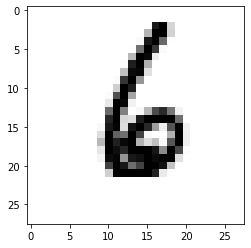

In [43]:
# parameters
num_epochs = 15
batch_size = 100
num_iterations = int(mnist.train.num_examples / batch_size)

with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    # Training cycle
    for epoch in range(num_epochs):
        avg_cost = 0
        
        for i in range(num_iterations):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, cost_val = sess.run([train, cost], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += cost_val / num_iterations
        print("Epoch: {:04d}, Cost: {:.9f}".format(epoch + 1, avg_cost))
        
    print("Learning finished")
    
    # Test the model using test sets
    print("Accuracy: ",
        accuracy.eval(
            session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels}
        ),
    )
    
    # Get one and predict
    r = random.randint(0,mnist.test.num_examples-1)
    print("Label: ",sess.run(tf.argmax(mnist.test.labels[r:r+1])))
    print(
        "Prediction: ", sess.run(tf.argmax(hypothesis,1), feed_dict={X:mnist.test.images[r:r+1]}),
    )
    
    plt.imshow(
        mnist.test.images[r:r+1].reshape(28,28),
        cmap = "Greys",
        interpolation="nearest",
    )
    plt.show()